### Introduction

I work on small projects as part of my progress in completing the fastai v2 course. I use kaggle to implement whatever I've learnt after each chapter [right now at Chapter 4!](https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb). 

In the chapter, a neural network was developed from scratch to distingush between 3 and 7 from the MNIST dataset. In this notebook, we change the code to classify the whole dataset (0-9).


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

!pip install --upgrade fastai
from fastai.vision.all import *


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 5.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.12
    Uninstalling fastai-2.7.12:
      Successfully uninstalled fastai-2.7.12


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


I setup a path pointing to the data first and also created a folder to store the images that will be created from the data. Note that the data provided is a csv file and not images.

In [2]:
path = Path("../input/digit-recognizer")
path.ls()
images_path = Path("../images")
images_path.mkdir(exist_ok=True)

train = pd.read_csv(path/"train.csv")
test = pd.read_csv(path/"test.csv")

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Other solutions convert the train dataset to images and work with [datablocks](https://docs.fast.ai/data.block.html#datablock), but as I'm trying to implement solutions in Ch-4, I'm going ahead with tensors and labels as X & Y. Note that the data in train_x are numbers in the range from 0 to 255, here it is one matrix instead of 3 usually in RGB. Hence it is best to normalize it (divide all by 255).

In [3]:
train_x = tensor(train.iloc[:,1:]).float()/255
train_y = tensor(train.iloc[:,:1])
train_x.shape, train_y.shape

(torch.Size([42000, 784]), torch.Size([42000, 1]))

Good idea to check if the rows indexed as train_x correspond to the labels by using fastai's *show_image*. `view` is a pytorch method to change the shape of a tensor without changing its contents. 

<Axes: >

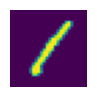

In [4]:
show_image(train_x[0].view(-1,28))

Next step is to create a dataset that could be used in a dataloader. A dataset should contain both the features and labels combined for the model to train. Using a dataloader also helps with batching.
This step is done for both the train and validation data.

In [5]:
dset = list(zip(train_x,train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

First, we wouldnt be using all the 42000 rows of the training data in every run through the model. Hence we use the concept of batching via DataLoaders

In [6]:
dl = DataLoader(dset, batch_size=256)

### Step 1: Initialize the parameters

First, we initialize the parameters to random values, and tell PyTorch that we want to track their gradients, using requires_grad_

In [ ]:
import torch.nn as nn 

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10)
)

### Step 2: Calculate the predictions



In [ ]:
#    for xb,yb in dl:
#        preds = model(xb)        

### Step 3: Calculate the loss


In [ ]:
#   loss = mnist_loss(preds, yb.squeeze())

In [ ]:
def mnist_loss(predictions, targets):
    error = nn.CrossEntropyLoss()
    return error(predictions, targets)

### Step 4: Calculate the gradients


In [ ]:
#        loss.backward()

### Step 5: Step the weights.


In [ ]:
#        opt.step()
#        opt.zero_grad()

### Step 6: Repeat the process

Each of the 5 steps above constitute an epoch. The model will be trained over multiple epochs and is designed to get better over each iteration

In [8]:

opt = torch.optim.Adam(simple_net.parameters(), lr=1e-2)

def train_epoch(model):
    total_loss = 0
    total_correct = 0
    total = 0

    for xb,yb in dl:
        preds = model(xb)        
        loss = mnist_loss(preds, yb.squeeze())
        loss.backward()

        opt.step()
        opt.zero_grad()
        total_loss += loss.item()
    
        # Calculate accuracy components
        with torch.no_grad():  # No need to track gradients here
            probs = model(xb).softmax(dim=1)
            preds = torch.max(probs, 1)[1]
            total_correct += (preds == yb.squeeze()).float().sum().item()
            total += len(yb)

    avg_loss = total_loss / len(dl)
    accuracy = 100 * total_correct / total
    print(f"Average Loss: {avg_loss}")
    print(f"Accuracy: {accuracy}%")
    
    
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)

train_model(simple_net, 30)

Average Loss: 0.3981167221159646
Accuracy: 89.26428571428572%
Average Loss: 0.1970618763204777
Accuracy: 94.61428571428571%
Average Loss: 0.15053197966436996
Accuracy: 95.95238095238095%
Average Loss: 0.124915442519793
Accuracy: 96.79523809523809%
Average Loss: 0.10788022199165866
Accuracy: 97.22619047619048%
Average Loss: 0.0948949148666791
Accuracy: 97.60238095238095%
Average Loss: 0.08345539275077031
Accuracy: 97.93809523809524%
Average Loss: 0.07362912242780581
Accuracy: 98.27142857142857%
Average Loss: 0.06961617553394965
Accuracy: 98.31190476190476%
Average Loss: 0.06444140522948918
Accuracy: 98.51666666666667%
Average Loss: 0.06153505816191407
Accuracy: 98.63809523809523%
Average Loss: 0.06125885867989961
Accuracy: 98.60952380952381%
Average Loss: 0.0642240517359107
Accuracy: 98.56666666666666%
Average Loss: 0.05708026345589932
Accuracy: 98.69047619047619%
Average Loss: 0.05598650830480355
Accuracy: 98.7547619047619%
Average Loss: 0.05579148306128583
Accuracy: 98.8%
Average Loss

## Never go full scratch! 

The above code had some inbuilt Pytorch functions that took care of parameter initialization, loss function and optimization function for the gradients. CrossEntropy loss wasnt even covered in Chapter4!

However, in the spirit of developing a model from scratch, I have replaced the built-in functions with steps that explain how each of the actions are performed. The performance takes a hit compared to the above implementation, but is still a good experience.

### Optimizer function
class BasicOptim performs the same initialization, stepping of weights and resetting bias to 0, which was done by the Adam Optimizer earlier.


In [ ]:
class basicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr
    
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr 
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

### Loss function
Class BasicOptim performs the same initialization, stepping of weights and resetting bias to 0, which was done by the Adam Optimizer earlier.

In [ ]:
def softmax(x):
    # Subtract max value for numerical stability
    exp_x = torch.exp(x - torch.max(x, dim=1, keepdim=True)[0])
    return exp_x / torch.sum(exp_x, dim=1, keepdim=True)


def cross_entropy_loss(predictions, targets):
    
    # Step 1: Apply softmax to convert logits to probabilities
    probs = softmax(predictions)

    # Step 2: Gather the probabilities of the true classes for each example.
    batch_size = predictions.shape[0]
    correct_class_probs = probs[range(batch_size), targets]

    # Step 3: Compute the negative log likelihood
    epsilon = 1e-12
    loss = -torch.log(correct_class_probs + epsilon)

    # Step 4: Take the average loss over the batch
    return torch.mean(loss)



### Parameter Initialization
All we have in simple_net is two linear classifiers with a max function between them. That little function res.max(tensor(0.0)) is called a rectified linear unit, also known as ReLU

Here, w1 and w2 are weight tensors, and b1 and b2 are bias tensors; that is, parameters that are initially randomly initialized.

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,10))
b2 = init_params(10)


def simple_net(xb):
    res = xb @ w1 + b1
    res = res.max(tensor(0.0))
    res = res @ w2 + b2
    return res

In [16]:
import torch.nn as nn 
import torch

def softmax(x):
    # Subtract max value for numerical stability
    exp_x = torch.exp(x - torch.max(x, dim=1, keepdim=True)[0])
    return exp_x / torch.sum(exp_x, dim=1, keepdim=True)


def cross_entropy_loss(predictions, targets):
    
    # Step 1: Apply softmax to convert logits to probabilities
    probs = softmax(predictions)

    # Step 2: Gather the probabilities of the true classes for each example.
    batch_size = predictions.shape[0]
    correct_class_probs = probs[range(batch_size), targets]

    # Step 3: Compute the negative log likelihood
    epsilon = 1e-12
    loss = -torch.log(correct_class_probs + epsilon)

    # Step 4: Take the average loss over the batch
    return torch.mean(loss)


     
class basicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr
    
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr 
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()
    
            
def simple_net(xb):
    
    res = xb @ w1 + b1
    res = res.max(tensor(0.0))
    res = res @ w2 + b2
    
    return res
            

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,10))
b2 = init_params(10)
lr = 1e-2
opt = basicOptim([w1,b1,w2,b2], lr)


    
def train_epoch(model):
    total_loss = 0
    total_correct = 0
    total = 0

    for xb,yb in dl:
        preds = model(xb)        
        loss = cross_entropy_loss(preds, yb.squeeze())
        loss.backward()

        opt.step()
        opt.zero_grad()
        total_loss += loss.item()
    
        # Calculate accuracy components
        with torch.no_grad():  # No need to track gradients here
            probs = model(xb).softmax(dim=1)
            preds = torch.max(probs, 1)[1]
            total_correct += (preds == yb.squeeze()).float().sum().item()
            total += len(yb)

    avg_loss = total_loss / len(dl)
    accuracy = 100 * total_correct / total
    print(f"Average Loss: {avg_loss}")
    print(f"Accuracy: {accuracy}%")
    

    
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)

train_model(simple_net, 30)

Average Loss: 19.682425007675633
Accuracy: 20.154761904761905%
Average Loss: 15.231511861627752
Accuracy: 34.75%
Average Loss: 13.083408321033824
Accuracy: 42.76904761904762%
Average Loss: 11.632037850582238
Accuracy: 47.09761904761905%
Average Loss: 9.626058815464829
Accuracy: 50.23571428571429%
Average Loss: 7.138738707340125
Accuracy: 54.67857142857143%
Average Loss: 5.555344997030316
Accuracy: 59.61666666666667%
Average Loss: 4.529182726325411
Accuracy: 63.195238095238096%
Average Loss: 3.76052830472137
Accuracy: 65.73571428571428%
Average Loss: 3.1792309446768328
Accuracy: 67.53333333333333%
Average Loss: 2.751117691487977
Accuracy: 68.98571428571428%
Average Loss: 2.4279137311559733
Accuracy: 70.03095238095239%
Average Loss: 2.1788007548361112
Accuracy: 70.9047619047619%
Average Loss: 1.9816493820060384
Accuracy: 71.64761904761905%
Average Loss: 1.82115953745264
Accuracy: 72.17619047619047%
Average Loss: 1.6878934966795371
Accuracy: 72.68095238095238%
Average Loss: 1.575314202272

### Conclusion 

In this notebook, I have trained a neural network to perform multi-class classification on the MNIST dataset and achieved reasonable results. I have also replaced the built-in pyTorch functions with ones that recreate the same steps in training a model.